In [4]:
key=['python']

In [5]:
# key=[]
# option=str(input("Enter:"))
# key.append(option)

In [7]:
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)

# colnames = ["keywords"]
# df = pd.read_csv("gtkeywords.csv", names=colnames)
# df2 = df["keywords"].values.tolist()
# df2.remove("Keywords")

dataset = []

for x in range(0,1):
    # keywords = [df2[x]]
     pytrend.build_payload(
     key,
     cat=0,
     timeframe='2005-01-01 2021-06-06',geo='GB')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('trends.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 2.0029563903808594


In [8]:
df=pd.read_csv("trends.csv")

In [9]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
series = read_csv('trends.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

<ipython-input-9-d48570ae25b4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [10]:
series.head()

date
2005-01-01    32
2005-02-01    35
2005-03-01    34
2005-04-01    28
2005-05-01    30
Name: python, dtype: int64

In [11]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

c:\users\kavik\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kavik\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\kavik\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 python   No. Observations:                  198
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -625.755
Date:                Tue, 29 Jun 2021   AIC                           1263.509
Time:                        07:20:45   BIC                           1283.208
Sample:                    01-01-2005   HQIC                          1271.484
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4930      0.051     -9.729      0.000      -0.592      -0.394
ar.L2         -0.4730      0.067     -7.035      0.000      -0.605      -0.341
ar.L3         -0.2797      0.076     -3.698      0.0

In [13]:
residuals = DataFrame(model_fit.resid)

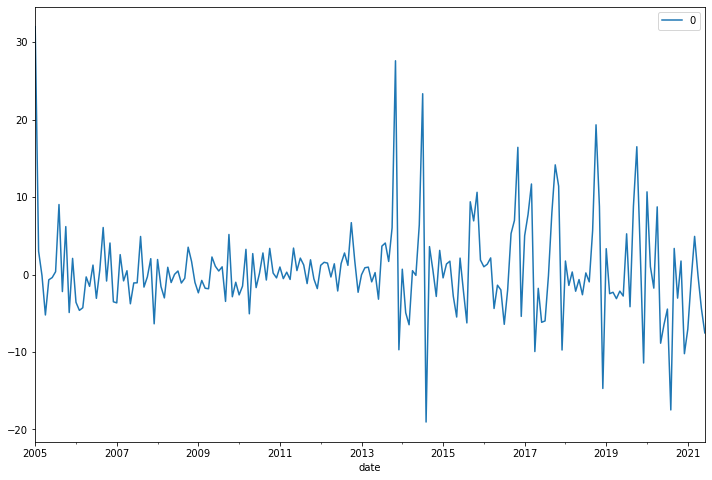

In [14]:
residuals.plot(figsize=(12,8))
pyplot.show()

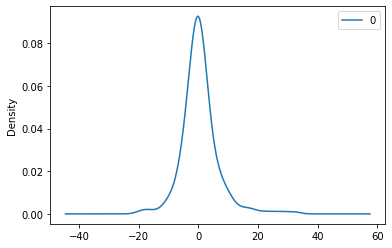

                0
count  198.000000
mean     0.539592
std      6.198078
min    -19.049624
25%     -2.271700
50%     -0.072735
75%      2.232413
max     32.000000


In [15]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

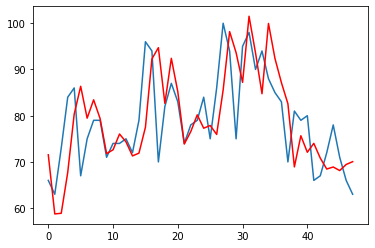

In [27]:
X = series.values
size = int(len(X) * 0.76)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [17]:
tp=pd.DataFrame(test,columns=['test'])

<AxesSubplot:>

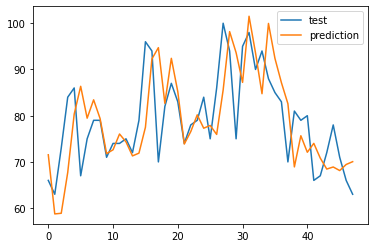

In [18]:
tp['prediction']=predictions
tp.plot()

<h3>Interest over time
Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [28]:
df

,date,python
0,2005-01-01,32
1,2005-02-01,35
2,2005-03-01,34
3,2005-04-01,28
4,2005-05-01,30
...,...,...
193,2021-02-01,72
194,2021-03-01,78
195,2021-04-01,71
196,2021-05-01,66


<AxesSubplot:>

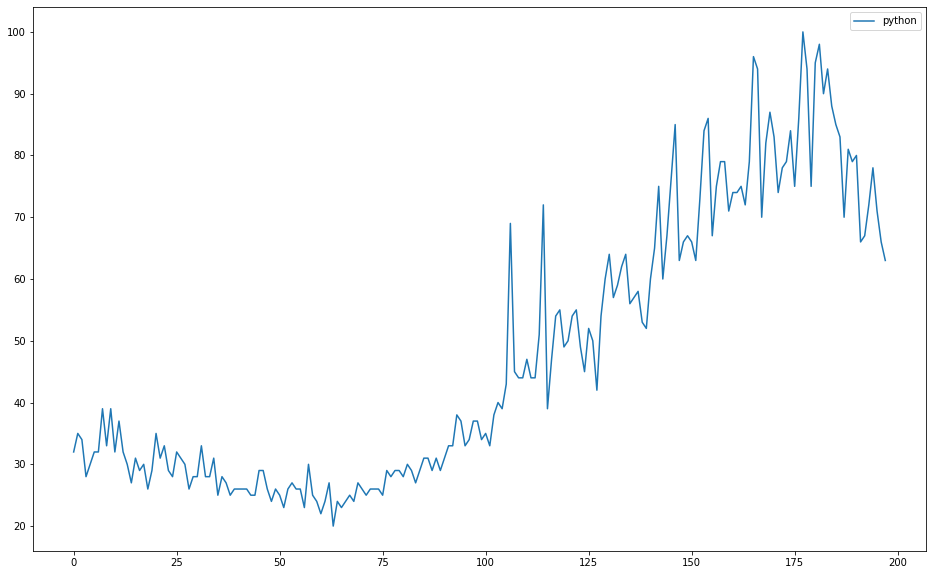

In [29]:
import matplotlib.pyplot as plt
df.plot(figsize=(16,10))

In [30]:
df['date'] =  pd.to_datetime(df['date'],format= '%Y-%m-%d')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day

In [31]:
df=df.drop('date',axis=1)

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(9,8))

In [ ]:
# key='artificial intelligence '
# data = df.groupby(['year'])[key].sum().sort_values().reset_index(). pivot(columns='year', values=key)
# data.plot(kind='bar', figsize = (12, 8))

In [ ]:

df["year"]=(df['year']-2005)

df["date_bloack"]=(df['year']*12 + df['month'])
df=df.drop('month',axis=1)
df=df.drop('year',axis=1)
df=df.drop('day',axis=1)

In [ ]:
df

In [ ]:
df.plot( x='date_bloack',figsize=(14,10))

In [ ]:
a=df.corr()
a

In [ ]:
a=a.drop('date_bloack',axis=0)


In [ ]:
a=a.drop('date_bloack',axis=1)

In [ ]:
a

In [ ]:
a.plot()

In [ ]:
df

In [ ]:
df=df.rename(columns={'deep learning ':'deep_learning', 'machine learning ': 'machine_learning', 'artificial intelligence':'artificial_intelligence','date_bloack':'date_block'})

In [ ]:
ml=df[df.machine_learning >80]
ml

In [ ]:
ml.plot()

In [ ]:
from googlesearch import search
from bs4 import BeautifulSoup
import requests
def find_date(details):
    for d in search(details, tld='co.in',lang='en',start=0,stop=1):
        
        site=d
        req=requests.get(site)
        
        if req.status_code !=200 :
            print("Error in getting information about date")
            return 
        soup=BeautifulSoup(req.content, 'html.parser')
        date=' '
        
        for l in soup.find_all('p'):
            date+=l.text
            date+='\n'
    return date       

In [ ]:
d=str("wiki corona")

print(find_date(d))


In [ ]:
d=str("TOI corona")

print(find_date(d))

In [ ]:
month=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
for i in month:
    d="TOI"+"i"+"corona"
    print(find_date(d))
    print("\n\n\n\n\nNEXT article")

In [ ]:
d=str("TOI may corona")

print(find_date(d))

In [ ]:
pytrend.build_payload(kw_list=['deep learning'])

related_queries=pytrend.related_queries()
related_queries.values()

In [ ]:
print(130 * 0.78)